# **IMPORTS**

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
from collections import Counter

```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

# **SETTINGS**
---

In [5]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [6]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [7]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [8]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

# **DATA**

---

In [9]:
def load_nasa_data(train, test, true_rul):
  column_names= ["unit", "cycle"] + [f"op_setting_{i}" for i in range(1, 4)] + [f"sensor_measure_{i}" for i in range(1, 22)]
  train_data= pd.read_csv(train, sep=r"\s+", header=None, names=column_names)
  test_data=  pd.read_csv(test, sep=r"\s+", header=None, names=column_names)
  true_rul=   pd.read_csv(true_rul, sep=r"\s+", header=None, names=["true_rul"])

  return train_data, test_data, true_rul, column_names

In [10]:
train_path, test_path, true_rul_path= "../data/01_raw/train_FD001.txt", "../data/01_raw/test_FD001.txt", "../data/01_raw/RUL_FD001.txt"

In [11]:
train_data, test_data, true_rul, column_names= load_nasa_data(train_path, test_path, true_rul_path)

In [12]:
train_data.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


In [13]:
test_data.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166


In [14]:
true_rul.head()

,true_rul
0,112
1,98
2,69
3,82
4,91


# **DATASET**

---

```bash
Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)
```

### Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine – i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:

1)	unit number
2)	time, in cycles
3)	operational setting 1
4)	operational setting 2
5)	operational setting 3
6)	sensor measurement  1
7)	sensor measurement  2
8)	(...)


26 ) sensor measurement  26

> Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, “Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation”, in the Proceedings of the Ist International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.

# **RELEVANT DOCUMENTATION**

---

[NASA Turbofan Jet Engine Data Set](https://www.kaggle.com/datasets/behrad3d/nasa-cmaps)

[Damage propagation modeling for aircraft engine run-to-failure simulation](https://www.semanticscholar.org/paper/Damage-propagation-modeling-for-aircraft-engine-Saxena-Goebel/026d286e149b17995d0f8c0abb4f060eb8e5d809)

[How Does a Turbofan Engine Work?](https://www.youtube.com/watch?v=7v-lyKce7U8)

# **DATA CHECKING**

---

In [15]:
print(f"""Data Checking

  Train Shape: {train_data.shape}
  Test Shape: {test_data.shape}
  True RUL Shape: {true_rul.shape}
  Total motors on train {train_data["unit"].nunique()}
  Total motors on test {test_data["unit"].nunique()}

Data types
  Train Data Types: {train_data.dtypes.value_counts()}
  Test Data Types: {test_data.dtypes.value_counts()}

Data verification
  Train Data Null Verification: {train_data.isnull().sum().sum()}
  Test Data Null Verification: {test_data.isnull().sum().sum()}
  True RUL Null Verification: {true_rul.isnull().sum().sum()}

  Train Data Duplicates: {train_data.duplicated().sum()}
  Test Data Duplicates: {test_data.duplicated().sum()}
""")

Data Checking

  Train Shape: (20631, 26)
  Test Shape: (13096, 26)
  True RUL Shape: (100, 1)
  Total motors on train 100
  Total motors on test 100

Data types
  Train Data Types: float64    22
int64       4
Name: count, dtype: int64
  Test Data Types: float64    22
int64       4
Name: count, dtype: int64

Data verification
  Train Data Null Verification: 0
  Test Data Null Verification: 0
  True RUL Null Verification: 0

  Train Data Duplicates: 0
  Test Data Duplicates: 0



In [16]:
train_data.loc[:,["unit", "cycle"]].describe()

,unit,cycle
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


We can see clearly what is actually on the readme from the dataset: 100 units; 100 cycles each; but actually, we can check that actually the mean and the qty doesn't match, and this is because we are seing the units by its ID —what means there are cycles numbers of rows for every unit. Is better seen on the exploration analysis.

The really important insight we can take from this is the cycle mean that tell us how many cycles we have per unit in mean. For this scenario, we have 100 units, and for each unit we have 108 cycles. Taking this like this can be problematic due to outliers since we can see the max cycle is 362, and the min is 1. We'll see this better later.

In [17]:
train_data.loc[:, "sensor_measure_1":].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
sensor_measure_1,20631.0,518.67,0.00,518.67,518.67,518.67,518.67,518.67
sensor_measure_2,20631.0,642.68,0.50,641.21,642.33,642.64,643.00,644.53
sensor_measure_3,20631.0,1590.52,6.13,1571.04,1586.26,1590.10,1594.38,1616.91
sensor_measure_4,20631.0,1408.93,9.00,1382.25,1402.36,1408.04,1414.55,1441.49
sensor_measure_5,20631.0,14.62,0.00,14.62,14.62,14.62,14.62,14.62
sensor_measure_6,20631.0,21.61,0.00,21.60,21.61,21.61,21.61,21.61
sensor_measure_7,20631.0,553.37,0.89,549.85,552.81,553.44,554.01,556.06
sensor_measure_8,20631.0,2388.10,0.07,2387.90,2388.05,2388.09,2388.14,2388.56
sensor_measure_9,20631.0,9065.24,22.08,9021.73,9053.10,9060.66,9069.42,9244.59
sensor_measure_10,20631.0,1.30,0.00,1.30,1.30,1.30,1.30,1.30


We can see a bunch of numbers, not much to take away from this more than few sensors wich have good values to analyze, or indeed, for our model to learn from, like: sensor_measure_2, sensor_measure_3, sensor_measure_4, sensor_measure_7, sensor_measure_12, and so on. We'll check this better later on the correlation matrix.

# **DATA EXPLORATION ANALYSIS**

---

In [18]:
train_data[train_data["unit"]== 1]

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [19]:
max_cycles_df= train_data.groupby(["unit"], sort= False)["cycle"].max().reset_index().rename(columns={"cycle": "max_cycle"})
max_cycles_df.head(3)

,unit,max_cycle
0,1,192
1,2,287
2,3,179


Then, we create a new dataset so we can work comfy with it avoiding mess the original data.

In [20]:
FD001_df= pd.merge(train_data, max_cycles_df, how= "inner", on= "unit")
FD001_df["RUL"]= FD001_df["max_cycle"] - FD001_df["cycle"]
FD001_df.head()

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187


In [21]:
print(FD001_df.shape)
FD001_df[["cycle", "RUL"]]

(20631, 28)


,cycle,RUL
0,1,191
1,2,190
2,3,189
3,4,188
4,5,187
...,...,...
20626,196,4
20627,197,3
20628,198,2
20629,199,1


> Here, 'RUL' is the value we want to predict. 'RUL' will be our `y`.

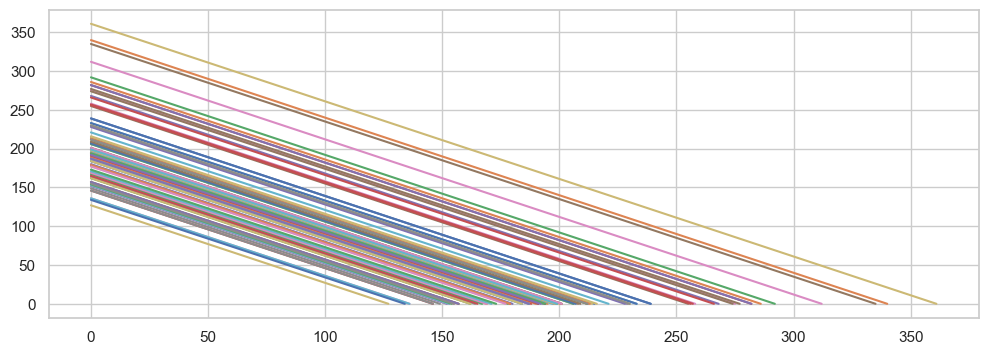

In [32]:
plt.figure(figsize=(12, 4))
one_engine = []

for i, r in FD001_df.iterrows():
  rul = r["RUL"]
  one_engine.append(rul)
  if rul == 0:
    plt.plot(one_engine)
    one_engine = []

plt.grid(True)
plt.show()

In [23]:
FD001_df.groupby("unit")["RUL"].diff().value_counts()

RUL
-1.0    20531
Name: count, dtype: int64

In this dataset, all the lines appear linear because the Remaining Useful Life (RUL) decreases by exactly one unit at each cycle until it reaches zero — the failure point. This linear behavior happens because RUL is measured strictly by usage count and, in this case, the dataset simulates only one failure mode under fixed operational conditions (sea level, according to the documentation).

Therefore, each engine follows a perfectly uniform degradation pattern with no interruptions, maintenance events, or external influences. This makes the dataset suitable for baseline predictive models but less representative of real-world degradation scenarios, where multiple failure modes and operating conditions are present. We see more of this in **FD002** or **FD004**, for example.

In [24]:
FD001_df

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


## Engine lifetime distribution

This plot shows the life cycle of a unit. The more hight the bar, mor cycles it has until the failure.

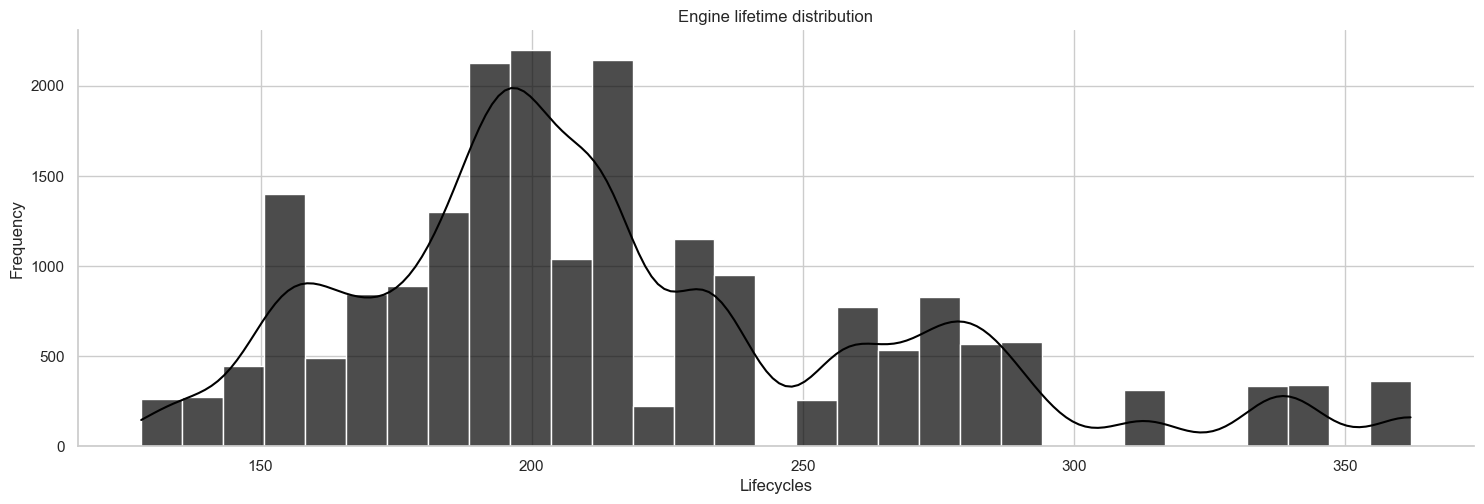

In [43]:
sns.displot(FD001_df["max_cycle"], kde= True, bins= 31, height= 5, aspect= 3, color= "black", alpha= .7)
plt.title("Engine lifetime distribution")
plt.xlabel("Lifecycles")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Correlation Matrix
Show us the correlation matrix for the dataset. Better visualise it with a heatmap.

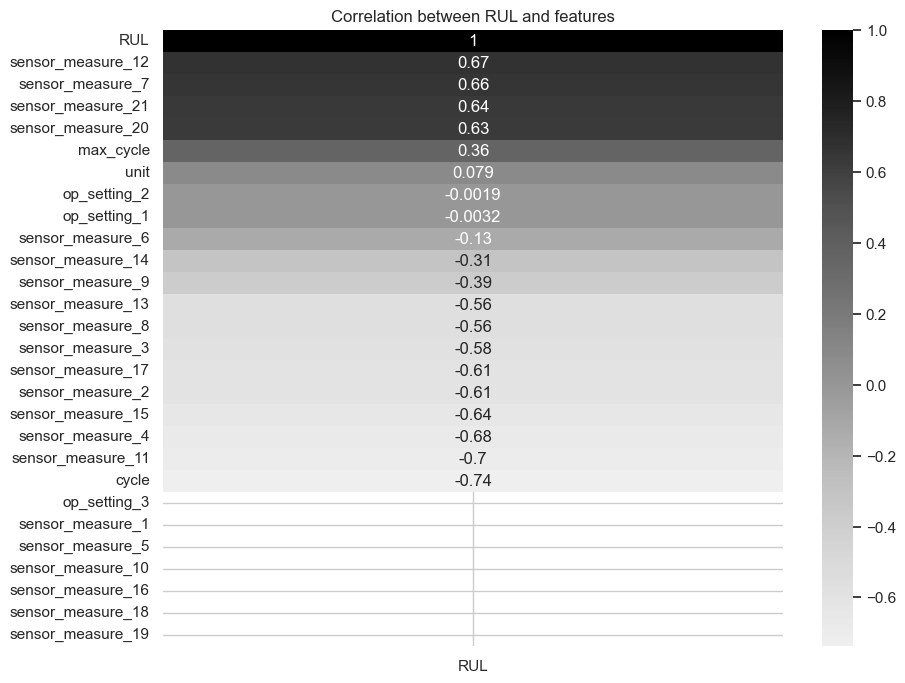

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(rul_corr.to_frame(), annot=True, cmap="Greys", center=0)
plt.title("Correlation between RUL and features")
plt.show()

To calculate the tendency line of the max cycle:

$$
\text{Max cycle} = m \cdot \text{Unit} + b
$$

Where:

- \(m\) is the slope of the line
- \(b\) is the y-intercept of the line


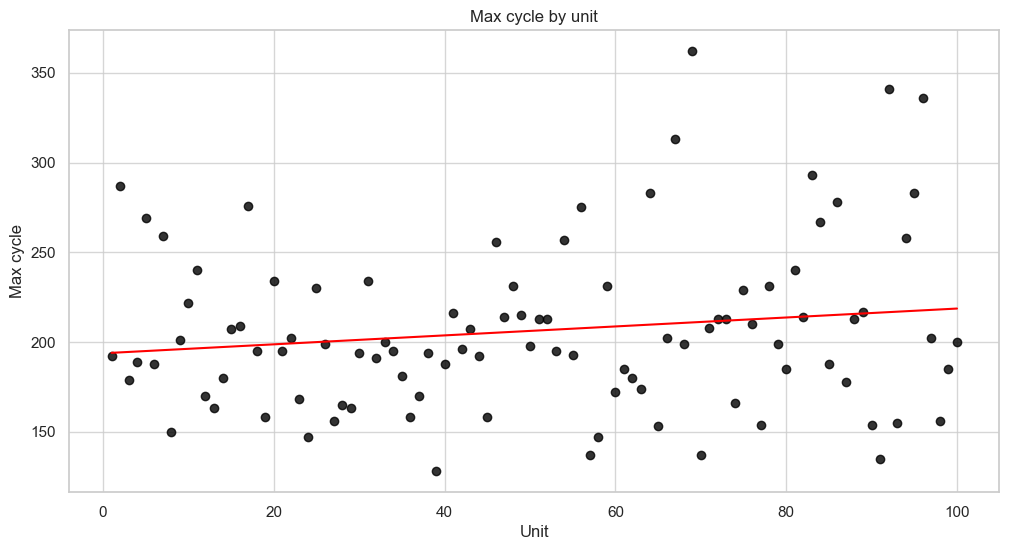

In [31]:
# We are using "_" before variables to avoid overwriting variables (not needed in this case but good practice)
max_cycles= FD001_df.groupby("unit")["cycle"].max()
_x, _y= max_cycles.index, max_cycles.values

plt.figure(figsize=(12, 6))
plt.scatter(_x, _y, alpha= .8, color= "black")

_m, _b= np.polyfit(_x, _y, 1)
plt.plot(_x, _m*_x + _b, color= "red")

plt.title("Max cycle by unit")
plt.xlabel("Unit")
plt.ylabel("Max cycle")
plt.grid(True, alpha= .8)
plt.show()

- **RUL distribution**: Most engines fail between 150–250 cycles, peaking around 200 cycles; a few reach up to ~360 cycles.

- **Feature–RUL correlations**: RUL strongly negatively correlates with `cycle` (−0.74) and several sensors (e.g., `sensor_measure_11`: −0.70); strong positive correlation with `sensor_measure_12` (0.67) and `sensor_measure_7` (0.66). Operational settings have near-zero correlation.

- **Max cycle by unit**: Engine lifetimes (`max_cycle`) vary significantly across units (1–100), ranging from ~130 to 360 cycles. No strong trend exists—some units fail early, others last much longer. The red line indicates a slight upward trend in average lifetime with unit number, but scatter is high.

| # | Insight | Justification / Evidence |
|---|---------|--------------------------|
| 1 | **`cycle` is the strongest predictor of RUL** | Correlation with RUL = **−0.736**; as cycles increase, RUL decreases linearly. |
| 2 | **Key predictive sensors**: `sensor_measure_12`, `sensor_measure_7`, `sensor_measure_21`, `sensor_measure_20` | High absolute correlation with RUL (≈ ±0.63 to ±0.67); confirmed by feature importance ranking. |
| 3 | **Operational settings (`op_setting_*`) are irrelevant for RUL prediction** | Near-zero correlations with RUL (|r| < 0.004); no predictive power. |
| 4 | **Engine lifetimes (`max_cycle`) are highly variable** | Range: ~130–360 cycles; no clear trend vs. unit number (scatterplot shows high dispersion). |
| 5 | **Strong multicollinearity among sensor groups** | E.g., `sensor_measure_2`, `3`, `4`, `11`, `15`, `17` form a high-positive-correlation cluster (r > 0.5); `sensor_measure_7`, `12`, `20`, `21` form a negative-positive mirrored group (r ≈ −0.8 to +0.76). |
| 6 | **RUL correlates positively with `max_cycle` (r = 0.363)** | Longer-lived engines have higher RUL at any given cycle, but variation remains large. |
| 7 | **Sensors 5, 10, 16, 18, 19 show no variation or NaN correlations** | Likely constant or missing—should be removed to reduce dimensionality. |
| 8 | **`sensor_measure_9` and `sensor_measure_14` are almost perfectly correlated (r = 0.963)** | Redundant—keep only one to avoid multicollinearity. |

> We're gonna see better insights when we are training the model on [02_modeling_fd001.ipynb](02_modeling_fd001.ipynb).

According to the next analysis [Nasa predictive Maintenance (RUL)](https://www.kaggle.com/code/wassimderbel/nasa-predictive-maintenance-rul), the real meaning of each sensor is:

* **sensor_measure_1**: (Fan inlet temperature) (◦R)
* **sensor_measure_2**: (LPC outlet temperature) (◦R)
* **sensor_measure_3**: (HPC outlet temperature) (◦R)
* **sensor_measure_4**: (LPT outlet temperature) (◦R)
* **sensor_measure_5**: (Fan inlet Pressure) (psia)
* **sensor_measure_6**: (bypass-duct pressure) (psia)
* **sensor_measure_7**: (HPC outlet pressure) (psia)
* **sensor_measure_8**: (Physical fan speed) (rpm)
* **sensor_measure_9**: (Physical core speed) (rpm)
* **sensor_measure_10**: (Engine pressure ratio(P50/P2))
* **sensor_measure_11**: (HPC outlet Static pressure) (psia)
* **sensor_measure_12**: (Ratio of fuel flow to Ps30) (pps/psia)
* **sensor_measure_13**: (Corrected fan speed) (rpm)
* **sensor_measure_14**: (Corrected core speed) (rpm)
* **sensor_measure_15**: (Bypass Ratio)
* **sensor_measure_16**: (Burner fuel-air ratio)
* **sensor_measure_17**: (Bleed Enthalpy)
* **sensor_measure_18**: (Required fan speed)
* **sensor_measure_19**: (Required fan conversion speed)
* **sensor_measure_20**: (High-pressure turbines Cool air flow)
* **sensor_measure_21**: (Low-pressure turbines Cool air flow)

The analysis says: "*A **low pressure compressor (LPC)** and **high pressure compressor (HPC)** supply compressed high temperature, high pressure gases to the combustor. **Low pressure turbine (LPT)** can decelerate and pressurize air to improve the chemical energy conversion efficiency of aviation kerosene. **High pressure turbines (HPT)** generate mechanical energy by using high temperature and high pressure gas strike turbine blades. **Low-pressure rotor (N1)**, **high-pressure rotor (N2)**, and nozzle guarantee the combustion efficiency of the engine.*"

![image](https://upload.wikimedia.org/wikipedia/commons/c/c0/Turbofan_operation.png)

Knowing this, we can figure out how the damage propagation flow works as an exponential degradation over the *HPC* health parameters:

*Efficiency*: $e(t)$


*Flow*: $f(t)$

and so the Health Index, which is calculated as the minimum of several operational margins (fan, HPC, HPT, EGT). Failure occurs when this index reaches zero.


In [60]:
# Code from Wassim derbel analysis
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

In [61]:
for i, x in enumerate(dict_list, 1):
    Sensor_dictionary[f"sensor_measure_{i}"] = x

In [62]:
def plot_signals_grid(df, Sensor_dic):
    n_sensors = len(Sensor_dic)
    n_cols = 3
    n_rows = int(np.ceil(n_sensors / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4), constrained_layout=True)
    axes = axes.flatten()
    
    for i in range(1, n_sensors + 1):
        ax = axes[i-1]
        signal_name = f"sensor_measure_{i}"
        for unit in df['unit'].unique():
            if unit % 10 == 0:  # For better visualization, plot signals of every 10th unit
                ax.plot(df[df['unit'] == unit]['RUL'].rolling(10).mean(),
                        df[df['unit'] == unit][signal_name].rolling(10).mean(),
                        alpha=0.7)
        ax.set_xlim(250, 0)
        ax.set_xticks(np.arange(0, 300, 25))
        ax.set_xlabel("Remaining Useful Life")
        ax.set_ylabel(Sensor_dic[signal_name])
        ax.set_title(signal_name)
    
    # Hide any empty subplots
    for j in range(n_sensors, len(axes)):
        fig.delaxes(axes[j])
    plt.show()

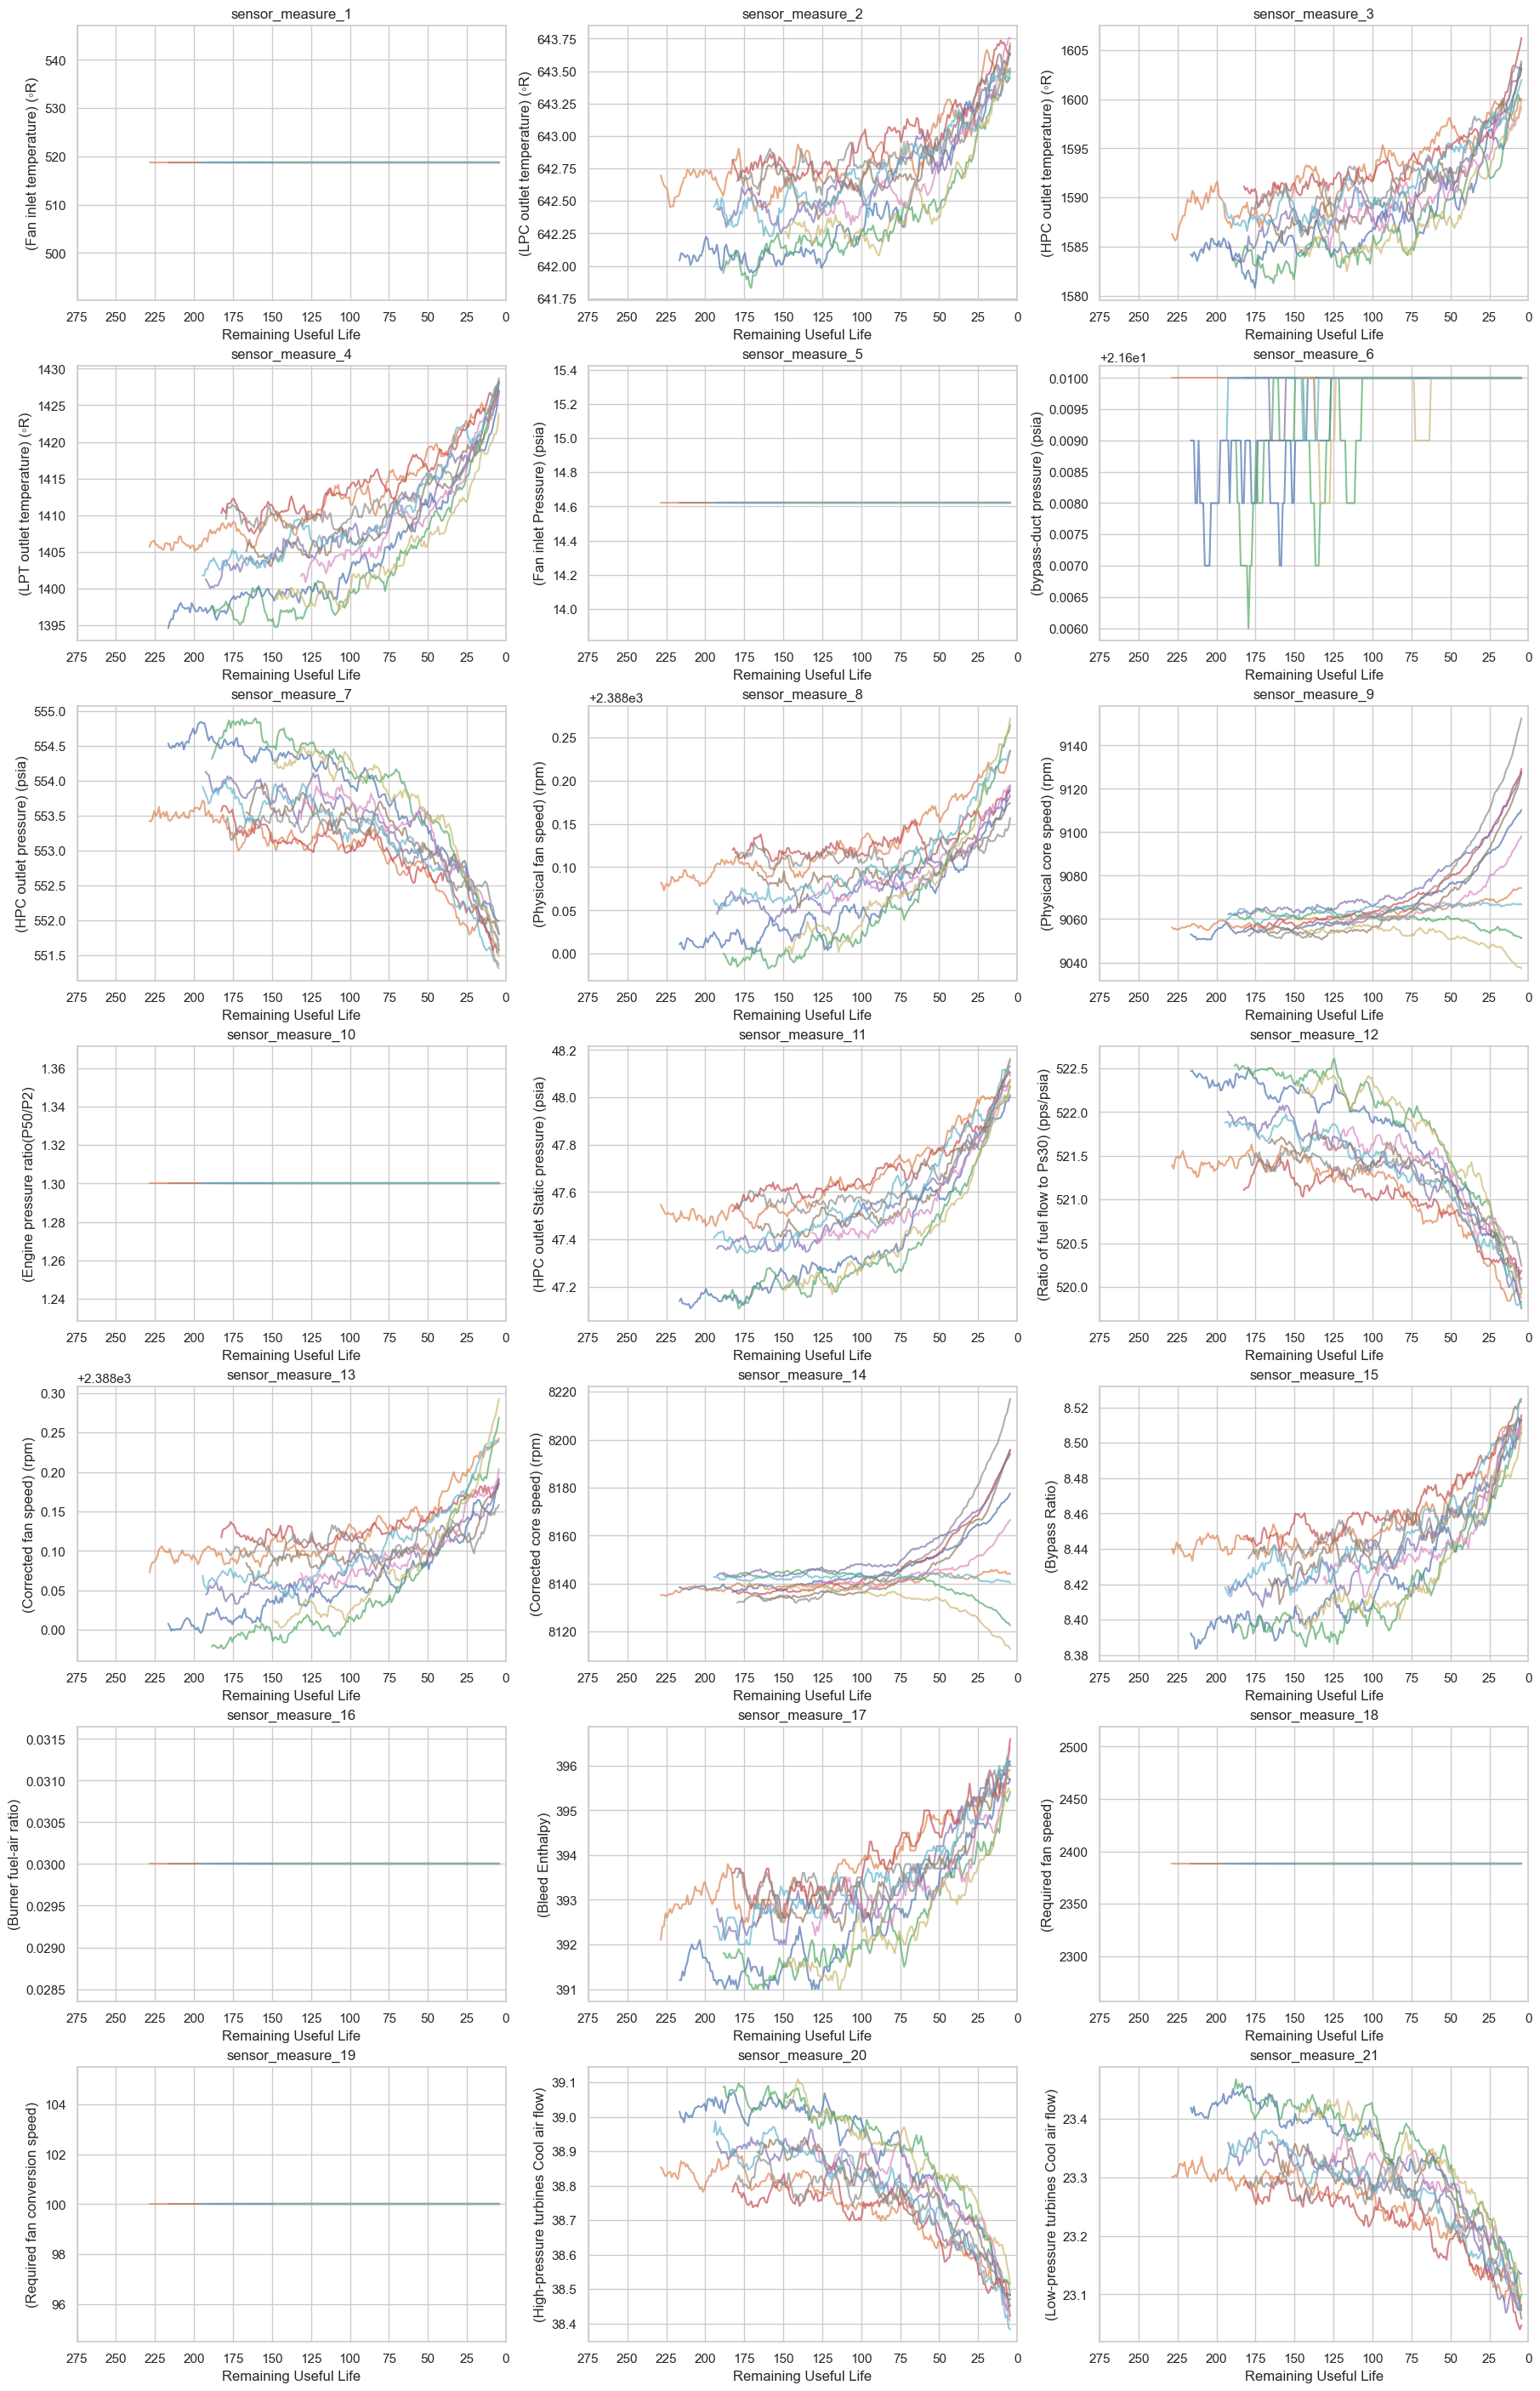

In [63]:
plot_signals_grid(FD001_df, Sensor_dictionary)

These plots show us that some sensors are constant over time, while others are not. We can drop the constant sensors and keep the rest hence they're not relevant and don't influence the RUL prediction.

In [65]:
def plot_sensors_boxplot(df, Sensor_dic):
    n_sensors = len(Sensor_dic)
    n_cols = 3
    n_rows = int(np.ceil(n_sensors / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4), constrained_layout=True)
    axes = axes.flatten()
    
    for i in range(1, n_sensors + 1):
        ax = axes[i-1]
        col_name = f"sensor_measure_{i}"
        ax.boxplot(df[col_name], vert=True, patch_artist=True,
                   boxprops=dict(facecolor="lightgray", color="black"),
                   medianprops=dict(color="red"))
        ax.set_title(f"{col_name} - {Sensor_dic[col_name]}")
        ax.set_ylabel("Sensor value")
        ax.grid(True, alpha=0.3)
    
    # Hide extra subplots
    for j in range(n_sensors, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

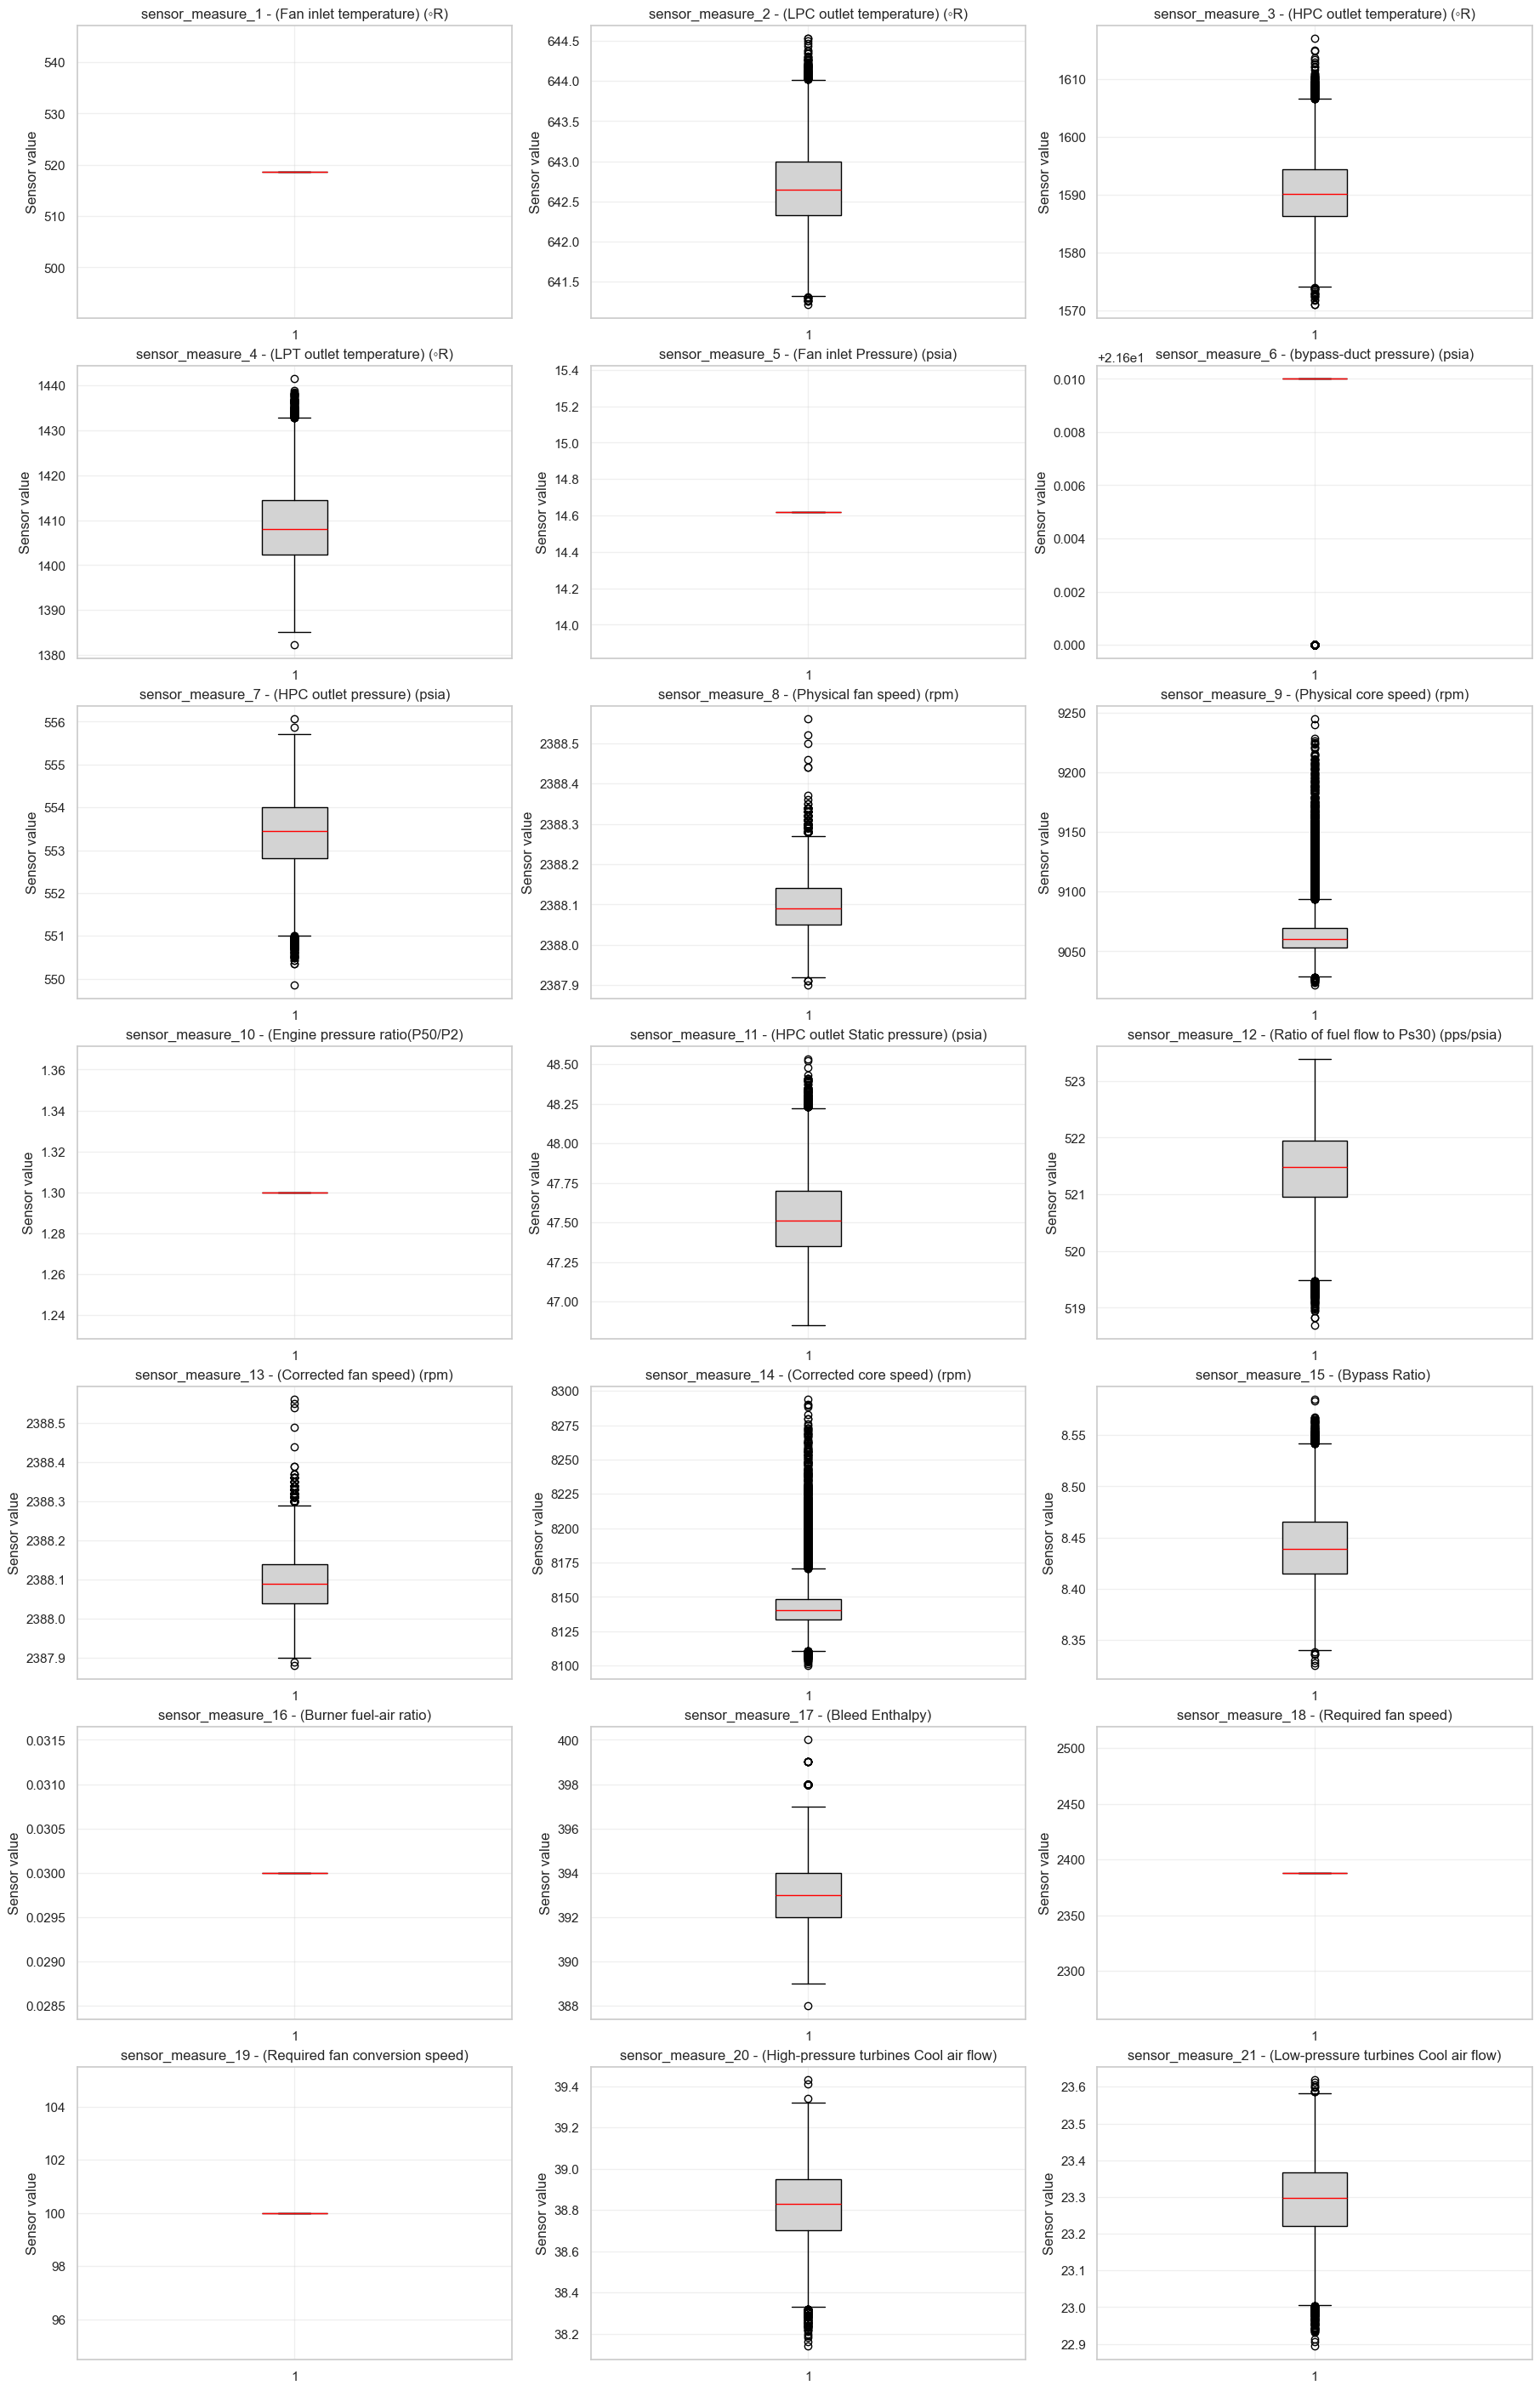

In [66]:
plot_sensors_boxplot(FD001_df, Sensor_dictionary)

We also can see that our data is kind of skewed, we got some outliers that we need to handle by normalizing the data. Saw before, our sensors don't have the same scale, so we need to normalize them in order to have a better performance overall in our models.

Indeed, there ends our analysis for this dataset. The next step is to prepare the data for the models and that's what we are going to do in the next notebook: [02_modeling_fd001.ipynb](02_modeling_fd001.ipynb).

# **EXPORT CSV**

---

In [67]:
FD001_df.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [68]:
FD001_test_df.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,192,191
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,192,190
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,192,189


In [70]:
true_rul.head(3)

,true_rul
0,112
1,98
2,69


In [72]:
# Designating save path
save_path= "../data/02_processed/"

# Saving FD001 for train
FD001_df.to_csv(save_path + "FD001_train.csv", index=False)

# Saving FD001 for test
FD001_test_df= pd.merge(test_data, max_cycles_df, how= "inner", on= "unit")
FD001_test_df["RUL"]= FD001_test_df["max_cycle"] - FD001_test_df["cycle"]
FD001_test_df.to_csv(save_path + "FD001_test.csv", index=False)

# Saving True RUL for validation
true_rul.to_csv(save_path + "FD001_RUL.csv", index=False)